# EDA Steam Games 

Exploratory data analysis (EDA) is a fundamental phase in the process of understanding and preparing data. In this case, we have a dataset related to games from Steam, a digital distribution platform for video games. This EDA will focus on exploring the different characteristics of the games present in the dataset.


In this phase, we are going to use Python and some of its libraries, such as pandas, matplotlib and seaborn, to explore and visualize our dataset.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

C:\Users\Mariana Mera\AppData\Local\Temp\ipykernel_16788\3274000403.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load dataset

In [6]:
file_path = '../data/games.csv'
games = pd.read_csv(file_path)

games.head(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Concise summary of the dataframe, including the number of rows and columns, the column names, the data types in each column, and the number of non-null values present in each column.

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85103 entries, 0 to 85102
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       85103 non-null  int64  
 1   Name                        85097 non-null  object 
 2   Release date                85103 non-null  object 
 3   Estimated owners            85103 non-null  object 
 4   Peak CCU                    85103 non-null  int64  
 5   Required age                85103 non-null  int64  
 6   Price                       85103 non-null  float64
 7   DLC count                   85103 non-null  int64  
 8   About the game              81536 non-null  object 
 9   Supported languages         85103 non-null  object 
 10  Full audio languages        85103 non-null  object 
 11  Reviews                     9743 non-null   object 
 12  Header image                85103 non-null  object 
 13  Website                     394

Detailed summary of the DataFrame games, including information about columns, data types, missing values, number of rows, and number of unique values.

In [8]:
df_summary = {
    'columns': games.columns,
    'types': games.dtypes,
    'missing': games.isna().sum(),
    'size': games.shape[0],
    'unique': games.nunique()
}

print(pd.DataFrame(df_summary))

                                               columns    types  missing  \
AppID                                            AppID    int64        0   
Name                                              Name   object        6   
Release date                              Release date   object        0   
Estimated owners                      Estimated owners   object        0   
Peak CCU                                      Peak CCU    int64        0   
Required age                              Required age    int64        0   
Price                                            Price  float64        0   
DLC count                                    DLC count    int64        0   
About the game                          About the game   object     3567   
Supported languages                Supported languages   object        0   
Full audio languages              Full audio languages   object        0   
Reviews                                        Reviews   object    75360   
Header image

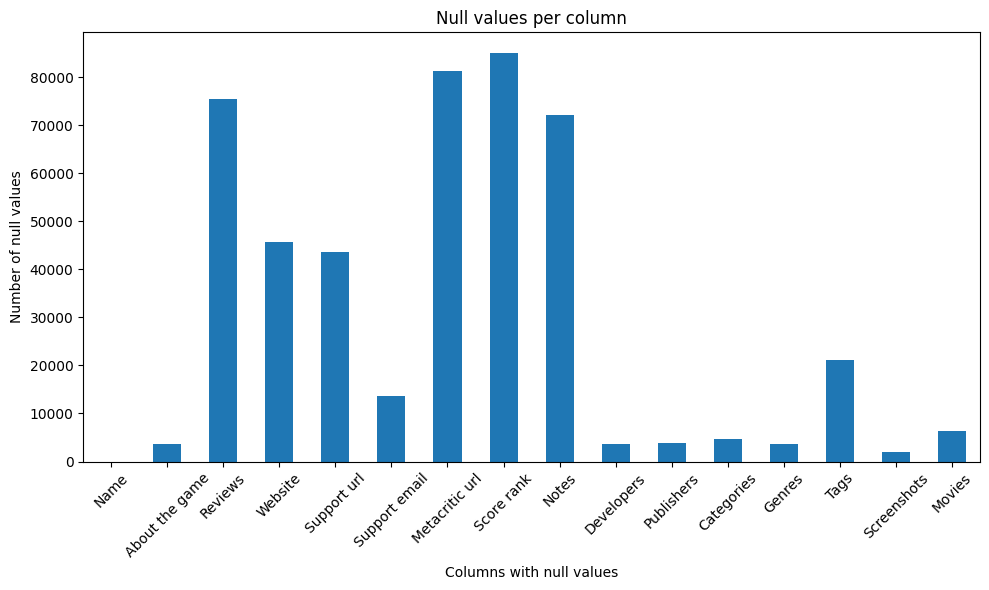

In [9]:
columns_with_nulls = games.columns[games.isnull().any()]

# Calcula la cantidad de valores nulos en cada columna filtrada
null_counts = games[columns_with_nulls].isnull().sum()

# Crea la gráfica de barras
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Null values per column')
plt.xlabel('Columns with null values')
plt.ylabel('Number of null values')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajustamos el diseño para evitar que se corten las etiquetas
plt.show()

We made a bar chart showing the number of columns of each type of data in the DataFrame games.

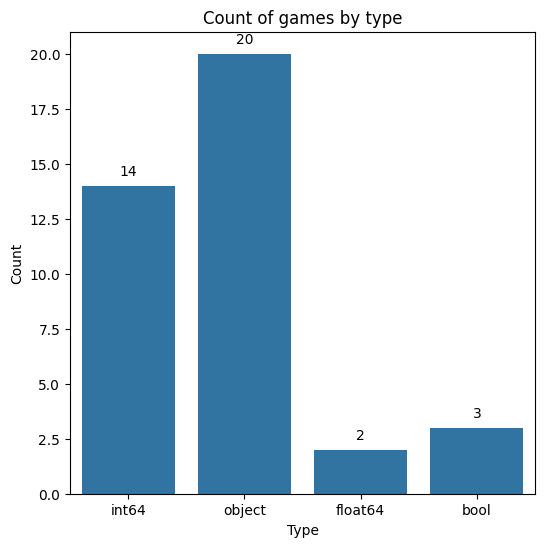

In [10]:
# Crear la gráfica de barras
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='types', data=df_summary)

# Agregar los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Añadir etiquetas y título
plt.title('Count of games by type')
plt.xlabel('Type')
plt.ylabel('Count')

# Mostrar la gráfica
plt.show()

We change the column names in the DataFrame games so that the first letter of each word in each column name is capitalized.

In [21]:
def capitalize_next_word(column_name):
    result = ""
    capitalize_next = True
    for char in column_name:
        if char == " ":
            capitalize_next = True
        elif capitalize_next:
            result += char.upper()
            capitalize_next = False
        else:
            result += char
    return result

games.rename(columns=capitalize_next_word, inplace=True)
games.columns


Index(['AppID', 'Name', 'ReleaseDate', 'EstimatedOwners', 'PeakCCU',
       'RequiredAge', 'Price', 'DLCCount', 'AboutTheGame',
       'SupportedLanguages', 'FullAudioLanguages', 'Reviews', 'HeaderImage',
       'Website', 'SupportUrl', 'SupportEmail', 'Windows', 'Mac', 'Linux',
       'MetacriticScore', 'MetacriticUrl', 'UserScore', 'Positive', 'Negative',
       'ScoreRank', 'Achievements', 'Recommendations', 'Notes',
       'AveragePlaytimeForever', 'AveragePlaytimeTwoWeeks',
       'MedianPlaytimeForever', 'MedianPlaytimeTwoWeeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [22]:
games.head(5)

,AppID,Name,ReleaseDate,EstimatedOwners,PeakCCU,RequiredAge,Price,DLCCount,AboutTheGame,SupportedLanguages,...,AveragePlaytimeTwoWeeks,MedianPlaytimeForever,MedianPlaytimeTwoWeeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


# Data Cleaning


### Release Date 

We convert the values in the 'ReleaseDate' column of the 'games' DataFrame into datetime objects, allowing these values to be more easily manipulated and analyzed as dates and times instead of simple text strings.

In [53]:
games['ReleaseDate'] = pd.to_datetime(games['ReleaseDate'], format='mixed')

In [61]:
games.head(10)

,AppID,Name,ReleaseDate,EstimatedOwners,PeakCCU,RequiredAge,Price,DLCCount,AboutTheGame,SupportedLanguages,...,AveragePlaytimeTwoWeeks,MedianPlaytimeForever,MedianPlaytimeTwoWeeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
5,1469160,Wartune Reborn,2021-02-26,50000 - 100000,68,0,0.00,0,Feel tired of auto-fight? Feel tired of boring...,['English'],...,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
6,1659180,TD Worlds,2022-01-09,0 - 20000,3,0,10.99,1,"TD Worlds is a dynamic, highly strategical gam...","['English', 'Russian', 'Danish']",...,0,0,0,MAKSIM VOLKAU,MAKSIM VOLKAU,"Single-player,Steam Achievements,Steam Cloud","Indie,Strategy","Tower Defense,Rogue-lite,RTS,Replay Value,Perm...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
7,1968760,Legend of Rome - The Wrath of Mars,2022-05-05,0 - 20000,2,0,9.99,0,When the Roman people honored a simple warrior...,"['English', 'German']",...,0,0,0,magnussoft,magnussoft,"Single-player,Steam Cloud",Casual,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
8,1178150,MazM: Jekyll and Hyde,2020-04-02,0 - 20000,1,0,14.99,0,'MazM: Jekyll and Hyde' is a darkly entertaini...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll...","Adventure,RPG,Simulation,Strategy","Adventure,Simulation,RPG,Strategy,Singleplayer...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
9,320150,Deadlings: Rotten Edition,2014-11-11,50000 - 100000,0,0,3.99,0,Death is lonely. He has zero friends on his Fa...,"['English', 'Polish', 'French', 'Italian', 'Ge...",...,0,782,0,ONE MORE LEVEL,ONE MORE LEVEL,"Single-player,Steam Achievements,Steam Trading

### Name 

Since there are only 6 records with null values in the 'Name' column out of 85,000 records, removing these records would have minimal impact on the overall size of the dataset. Therefore, the loss of information is minimal compared to the improvement in data quality.

In [11]:
games.loc[games['Name'].isna()].index

Index([25222, 72038, 77215, 77487, 77561, 77721], dtype='int64')

In [12]:
#Delete null names 
games = games.drop(games.loc[games['Name'].isna()].index)

In [13]:
nulos_name = games[games['Name'].isna()]
print('Name:', len(nulos_name))

Name: 0


### About the Game 

Imputing missing values with an empty value ('') ensures that all records have a value in the 'AboutTheGame' column, which maintains consistency in the DataFrame.

In [24]:
games['AboutTheGame'].fillna('', inplace=True)


In [25]:
nulos_name = games[games['AboutTheGame'].isna()]
print('AboutTheGame:', len(nulos_name))

AboutTheGame: 0


### SupportedLanguages

The data in the SupportedLanguages column are stored as text strings representing lists of languages supported in each set.

Calculates the number of supported languages for each set based on the information provided in the 'SupportedLanguages' column and stores it in a new column called 'NumSupportedLanguages'. 

In [26]:
games["SupportedLanguages"]

0                                              ['English']
1        ['English', 'French', 'Italian', 'German', 'Sp...
2                       ['English', 'Portuguese - Brazil']
3        ['English', 'French', 'Italian', 'German', 'Sp...
4                           ['English', 'Spanish - Spain']
                               ...                        
85098                               ['English', 'Finnish']
85099                                          ['English']
85100                                          ['English']
85101                                          ['English']
85102                                          ['English']
Name: SupportedLanguages, Length: 85097, dtype: object

In [28]:
def clean_supported_languages(games):
    games['CleanSupportedLanguages'] = games['SupportedLanguages'].str.replace(r'\\r\\n', ',') \
        .str.replace("]", '') \
        .str.replace('[', '') \
        .str.replace("'", '') \
        .str.replace('\\\\', '') \
        .str.replace(r'\[b\]\[/b\]', '') \
        .str.replace(r'\\\[', '') \
        .str.replace(r'\\\]', '') \
        .str.replace('#', '') \
        .str.replace('b/b', '') \
        .str.replace('&amp;lt;', '') \
        .str.replace('strong&amp;gt;/strong&amp;gt;', '') \
        .str.replace('br /&amp;gt;br /&amp;gt;', '') \
        .str.lstrip(", ") \
        .str.strip()
    
    return games

df = clean_supported_languages(games) 

In [29]:
def count_countries(games):
    
    countries = games['CleanSupportedLanguages'].str.split(', ')
    
    all_countries = [country for sublist in countries.dropna() for country in sublist]
    
    country_counts = pd.Series(all_countries).value_counts()
    
    return country_counts

country_counts = count_countries(games)

print(country_counts.to_string())

English                                                                 78060
Simplified Chinese                                                      19306
German                                                                  18651
French                                                                  18074
Russian                                                                 17382
Spanish - Spain                                                         16709
Japanese                                                                15409
Italian                                                                 12600
Korean                                                                   9906
Traditional Chinese                                                      9574
Portuguese - Brazil                                                      9501
Polish                                                                   7545
Turkish                                                         

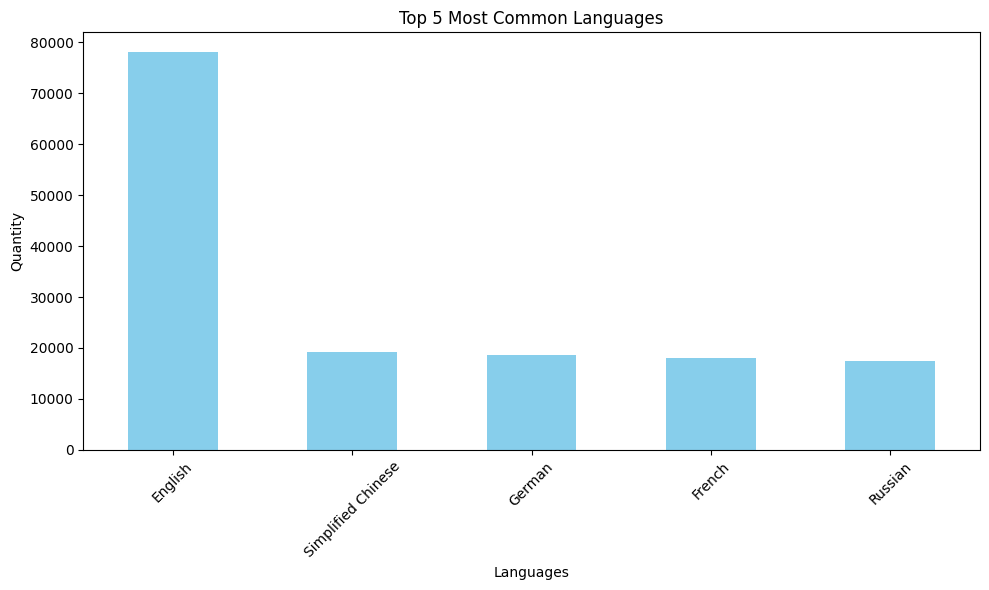

In [30]:
top_countries = country_counts.head(5)


plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Common Languages')
plt.xlabel('Languages')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Developers	

Categories 